In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Eski_Istasyonlar.shp
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Yeni_Istasyonlar.shx
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Eski_Istasyonlar.cpg
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Ilce_Sinirlari_Polygon.prj
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/__results__.html
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.cpg
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Yeni_Istasyonlar.dbf
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.shp
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Eski_Istasyonlar.shx
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Yeni_Istasyonlar.shp
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Ilce_Sinirlari_Polygon.cpg
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.shx
/kaggle/input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Eski_Istasyonlar.dbf
/kaggle/input/2204-d-l-ve-l-e-v

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from matplotlib.colors import ListedColormap

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
gercek_table = pd.read_csv("../input/2204-d-mgm-ndvi-e-le-tirmesi-ve-tahmini-ndvi/gercek_table.csv")
gercek_table.drop(columns="Unnamed: 0", inplace=True)
tahmin_table = pd.read_csv("../input/2204-d-mgm-ndvi-e-le-tirmesi-ve-tahmini-ndvi/tahmini_table.csv")
tahmin_table.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
gercek_table

In [ ]:
tahmin_table

In [ ]:
gercek_table.describe()

In [ ]:
tahmin_table.describe()

In [4]:
gercek_table = pd.concat([gercek_table, tahmin_table], ignore_index=True)
gercek_table

,yıl,ort,ortmax_sic,ort_sic,ortmin_sic,max_sic,min_sic,max_yag,top_yag,ist,yer
0,2000,0.084135,17.791667,11.525000,5.433333,40.00000,-16.000000,23.600000,349.200000,Aksaray_ist,Sultanhani
1,2000,0.080301,17.791667,11.525000,5.433333,40.00000,-16.000000,23.600000,349.200000,Aksaray_ist,Acigol
2,2000,0.109988,17.791667,11.525000,5.433333,40.00000,-16.000000,23.600000,349.200000,Aksaray_ist,Ortakoy
3,2000,0.108092,17.791667,11.525000,5.433333,40.00000,-16.000000,23.600000,349.200000,Aksaray_ist,Guzelyurt
4,2000,0.089740,17.791667,11.525000,5.433333,40.00000,-16.000000,23.600000,349.200000,Aksaray_ist,Gulagac
...,...,...,...,...,...,...,...,...,...,...,...
1959,2026,0.119022,17.918444,10.997716,18.297049,37.24422,-17.635429,30.399741,355.763971,Kulu_ist,Cihanbeyli
1960,2026,0.121691,17.918444,10.997716,18.297049,37.24422,-17.635429,30.399741,355.763971,Kulu_ist,Evren
1961,2026,0.124545,17.918444,10.997716,18.297049,37.24422,-17.635429,30.399741,355.763971,Kulu_ist,Golbasi
1962,2026,0.143303,17.918444,10.997716,18.297049,37.24422,-17.635429,30.399741,355.763971,Kulu_ist,Haymana


In [ ]:
gercek_table.describe()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="red").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="red").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="red").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="red").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="red").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="red").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="red").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="red").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="red").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="red").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="red").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_sic", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="red").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Maksimum Sıcaklık (°C)")
axs[1][0].set(ylabel = "Yıllık Maksimum Sıcaklık (°C)")
fig.suptitle("İstasyonların Yıllık Maksimum Sıcaklık Grafikleri", fontsize=20)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="maroon").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="maroon").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="maroon").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="maroon").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="maroon").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="maroon").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="maroon").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="maroon").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="maroon").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="maroon").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="maroon").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmax_sic", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="maroon").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Ortalama Maksimum Sıcaklık (°C)")
axs[1][0].set(ylabel = "Yıllık Ortalama Maksimum Sıcaklık (°C)")
fig.suptitle("İstasyonların Yıllık Ortalama Maksimum Sıcaklık Grafikleri", fontsize=20)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="yellow").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="yellow").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="yellow").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="yellow").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="yellow").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="yellow").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="yellow").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="yellow").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="yellow").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="yellow").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="yellow").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ort_sic", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="yellow").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Ortalama Sıcaklık (°C)")
axs[1][0].set(ylabel = "Yıllık Ortalama Sıcaklık (°C)")
fig.suptitle("İstasyonların Yıllık Ortalama Sıcaklık Grafikleri", fontsize=20)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="darkorange").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="darkorange").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="darkorange").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="darkorange").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="darkorange").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="darkorange").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="darkorange").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="darkorange").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="darkorange").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="darkorange").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="darkorange").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="min_sic", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="darkorange").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Minimum Sıcaklık (°C)")
axs[1][0].set(ylabel = "Yıllık Minimum Sıcaklık (°C)")
fig.suptitle("İstasyonların Yıllık Minimum Sıcaklık Grafikleri", fontsize=20)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="orange").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="orange").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="orange").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="orange").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="orange").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="orange").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="orange").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="orange").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="orange").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="orange").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="orange").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="ortmin_sic", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="orange").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Ortalama Minimum Sıcaklık (°C)")
axs[1][0].set(ylabel = "Yıllık Ortalama Minimum Sıcaklık (°C)")
fig.suptitle("İstasyonların Yıllık Ortalama Minimum Sıcaklık Grafikleri", fontsize=20)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="blue").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="blue").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="blue").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="blue").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="blue").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="blue").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="blue").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="blue").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="blue").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="blue").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="blue").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="max_yag", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="blue").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Maksimum Yağış (mm)")
axs[1][0].set(ylabel = "Yıllık Maksimum Yağış (mm)")
fig.suptitle("İstasyonların Yıllık Maksimum Yağış Grafikleri", fontsize=20)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,6,figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Aksaray_ist"], ax=axs[0][0], color="mediumturquoise").set(title='Aksaray',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Beysehir_ist"], ax=axs[0][1], color="mediumturquoise").set(title='Beyşehir',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Çumra_ist"], ax=axs[0][2], color="mediumturquoise").set(title='Çumra',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Ereğli_ist"], ax=axs[0][3], color="mediumturquoise").set(title='Ereğli',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Karaman_ist"], ax=axs[0][4], color="mediumturquoise").set(title='Karaman',xlabel = "Yıl\n")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Karapınar_ist"], ax=axs[0][5], color="mediumturquoise").set(title='Karapınar',xlabel = "Yıl\n")

sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Konya_ist"], ax=axs[1][0], color="mediumturquoise").set(title='Konya',xlabel = "Yıl")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Kulu_ist"], ax=axs[1][1], color="mediumturquoise").set(title='Kulu',xlabel = "Yıl")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Niğde_ist"], ax=axs[1][2], color="mediumturquoise").set(title='Niğde',xlabel = "Yıl")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Seydişehir_ist"], ax=axs[1][3], color="mediumturquoise").set(title='Seydişehir',xlabel = "Yıl")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Konya_Ort_ist"], ax=axs[1][4], color="mediumturquoise").set(title='Konya Geneli',xlabel = "Yıl")
sns.lineplot(x="yıl", y="top_yag", data= gercek_table[gercek_table.ist == "Havza_Ort_ist"], ax=axs[1][5], color="mediumturquoise").set(title='Havza Geneli',xlabel = "Yıl")

sns.despine(left=True)
axs[0][0].set(ylabel = "Yıllık Toplam Yağış (mm)")
axs[1][0].set(ylabel = "Yıllık Toplam Yağış (mm)")
fig.suptitle("İstasyonların Yıllık Toplam Yağış Grafikleri", fontsize=20)
plt.show()

In [ ]:
gercek_table[gercek_table.ist == "Aksaray_ist"]

In [ ]:
gercek_table[gercek_table.ist == "Aksaray_ist"].yer.drop_duplicates()

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
count1=0
count2=0
for i in gercek_table[gercek_table.ist == "Aksaray_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count1][count2],
                 color = "green").set(title=i,xlabel = "Yıl")
    count2+=1
    if count2 == 5:
        count2=0
        count1=1
    
sns.despine(left=True)
axs[0][0].set(ylabel = "Ortalama NDVI")
axs[1][0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Aksaray İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 7, figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
count1=0
count2=0
for i in gercek_table[gercek_table.ist == "Beysehir_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count1][count2], 
                 color = "green").set(title=i,xlabel = "Yıl")
    count2+=1
    if count2 == 7:
        count2=0
        count1=1
    
sns.despine(left=True)
axs[0][0].set(ylabel = "Ortalama NDVI")
axs[1][0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Beyşehir İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Çumra_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Çumra_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Çumra İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Ereğli_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Ereğli_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Ereğli İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Karapınar_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Karapınar_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Karapınar İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Karaman_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Karaman_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Karaman İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Konya_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Konya_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Konya İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
sns.set_style("whitegrid")
count1=0
count2=0
for i in gercek_table[gercek_table.ist == "Niğde_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count1][count2], 
                 color = "green").set(title=i,xlabel = "Yıl")
    count2+=1
    if count2==5:
        count2=0
        count1=1
    
sns.despine(left=True)
axs[0][0].set(ylabel = "Ortalama NDVI")
axs[1][0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Niğde İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Seydişehir_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Seydişehir_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Seydişehir İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(gercek_table[gercek_table.ist == "Kulu_ist"].yer.drop_duplicates()), figsize=(30, 6), sharey=True)
sns.set_style("whitegrid")
count=0
for i in gercek_table[gercek_table.ist == "Kulu_ist"].yer.drop_duplicates():
    sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == i], ax=axs[count], color = "green").set(title=i,xlabel = "Yıl")
    count+=1
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Kulu İstasyonuna Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [ ]:
gercek_table[gercek_table.ist == "Konya_Ort_ist"].yer.drop_duplicates()

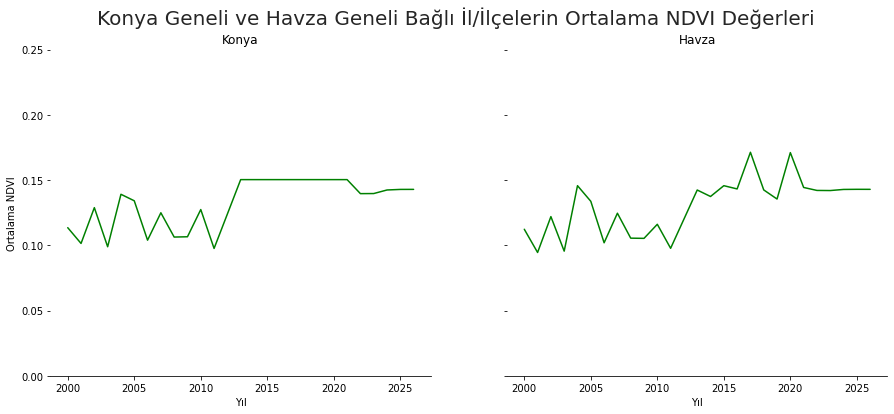

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.set_style("whitegrid")
sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == "Konya_il"], ax=axs[0], color = "green").set(title="Konya", xlabel = "Yıl")
sns.lineplot(x="yıl", y="ort", data= gercek_table[gercek_table.yer == "Havza"], ax=axs[1], color = "green").set(title="Havza", xlabel = "Yıl")
    
sns.despine(left=True)
axs[0].set(ylabel = "Ortalama NDVI")
fig.suptitle("Konya Geneli ve Havza Geneli Bağlı İl/İlçelerin Ortalama NDVI Değerleri", fontsize=20)
plt.ylim(0, 0.25)
plt.show()

In [7]:
son_df = tahmin_table[tahmin_table.yıl==2026]
meteoroloji = son_df.drop(columns=["ort", "yer"]).drop_duplicates()
meteoroloji = meteoroloji.rename(columns={"ist":"İstasyon", "yıl":"Yıl", "max_sic":"Maksimum Sıcaklık", "ortmax_sic": "Ortalama Maksimum Sıcaklık",
                            "ort_sic":"Ortalama Sıcaklık", "min_sic":"Minimum Sıcaklık", "ortmin_sic":"Ortalama Minimum Sıcaklık",
                            "max_yag":"Maksimum Yağış", "top_yag":"Toplam Yağış"})
meteoroloji = meteoroloji.set_index("İstasyon")
meteoroloji

,Yıl,Maksimum Sıcaklık,Ortalama Maksimum Sıcaklık,Ortalama Sıcaklık,Minimum Sıcaklık,Ortalama Minimum Sıcaklık,Maksimum Yağış,Toplam Yağış
İstasyon,,,,,,,,
Aksaray_ist,2026,37.159795,18.859530,12.792895,-17.802214,6.488273,31.094226,348.285514
Beysehir_ist,2026,35.688446,17.952272,11.237759,-17.483743,18.013265,54.049280,482.842314
Çumra_ist,2026,37.067669,18.573367,12.026966,-18.255571,18.716968,33.461804,340.673486
Ereğli_ist,2026,37.343678,19.720888,13.266215,-17.676843,19.628204,24.150686,309.577200
Havza_Ort_ist,2026,37.237008,19.420350,12.433242,-17.062686,15.346626,30.011749,390.364800
Konya_Ort_ist,2026,37.100523,18.841181,12.407623,-17.419900,18.326112,31.488419,425.742800
Konya_ist,2026,37.523688,18.952180,12.801815,-15.582729,18.795094,34.702681,339.329814
Niğde_ist,2026,37.018431,18.302543,11.691642,-17.376829,6.176433,31.591348,345.068114
Seydişehir_ist,2026,37.030548,18.570374,11.781276,-18.402157,18.681616,31.266668,444.629971


In [8]:
ndvis_df = son_df[["yer", "yıl", "ort", "ist"]]
ndvis_df = ndvis_df.rename(columns={"ist":"İstasyon", "yıl":"Yıl", "max_sic":"Maksimum Sıcaklık", "ortmax_sic": "Ortalama Maksimum Sıcaklık",
                            "ort_sic":"Ortalama Sıcaklık", "min_sic":"Minimum Sıcaklık", "ortmin_sic":"Ortalama Minimum Sıcaklık",
                            "max_yag":"Maksimum Yağış", "top_yag":"Toplam Yağış", "yer":"Yer"})
ndvis_df = ndvis_df.set_index("Yer")
ndvis_df[ndvis_df.İstasyon == "Aksaray_ist"].drop(columns="İstasyon").T

Yer,Sariyahsi,Acigol,Agacoren,Aksaray,Aksaray_il,Eskil,Gulagac,Guzelyurt,Ortakoy,Sultanhani
Yıl,2026.000000,2026.000000,2026.000000,2026.000000,2026.00000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
ort,0.137013,0.114743,0.125771,0.124354,0.13589,0.140422,0.129651,0.134588,0.126292,0.153728


In [ ]:
ndvis_df[ndvis_df.İstasyon == "Beysehir_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Çumra_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Ereğli_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Konya_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Niğde_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Seydişehir_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Karaman_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Karapınar_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Kulu_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Konya_Ort_ist"].drop(columns="İstasyon").T

In [ ]:
ndvis_df[ndvis_df.İstasyon == "Havza_Ort_ist"].drop(columns="İstasyon").T

In [9]:
sonb_df = gercek_table[gercek_table.yıl==2021]
ndvi_df = sonb_df[["yer", "yıl", "ort", "ist"]]
ndvi_df = ndvi_df.rename(columns={"ist":"İstasyon", "yıl":"Yıl", "max_sic":"Maksimum Sıcaklık", "ortmax_sic": "Ortalama Maksimum Sıcaklık",
                            "ort_sic":"Ortalama Sıcaklık", "min_sic":"Minimum Sıcaklık", "ortmin_sic":"Ortalama Minimum Sıcaklık",
                            "max_yag":"Maksimum Yağış", "top_yag":"Toplam Yağış", "yer":"Yer"})
ndvi_df = ndvi_df.set_index("Yer")
ndvi_df[ndvi_df.İstasyon == "Aksaray_ist"].drop(columns="İstasyon").T

Yer,Gulagac,Sultanhani,Acigol,Eskil,Sariyahsi,Guzelyurt,Aksaray,Agacoren,Aksaray_il,Ortakoy
Yıl,2021.000000,2021.000000,2021.00000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.00000
ort,0.115494,0.159736,0.09549,0.138873,0.128511,0.125217,0.104339,0.104361,0.128835,0.10881


In [ ]:
ndvi_df[ndvi_df.İstasyon == "Beysehir_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Çumra_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Ereğli_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Konya_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Niğde_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Seydişehir_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Karaman_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Karapınar_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Kulu_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Konya_Ort_ist"].drop(columns="İstasyon").T

In [ ]:
ndvi_df[ndvi_df.İstasyon == "Havza_Ort_ist"].drop(columns="İstasyon").T

In [10]:
fark_df = pd.DataFrame(ndvi_df.ort - ndvis_df.ort)
fark_df

,ort
Yer,
Acigol,-0.019253
Agacoren,-0.021410
Ahirli,0.041723
Akoren,0.004750
Aksaray,-0.020016
...,...
Ulukisla,0.000574
Urgup,0.001895
Yalihuyuk,0.041292


In [ ]:
fark_df["ort"].loc["Havza"] = -0.001438 # non-reel

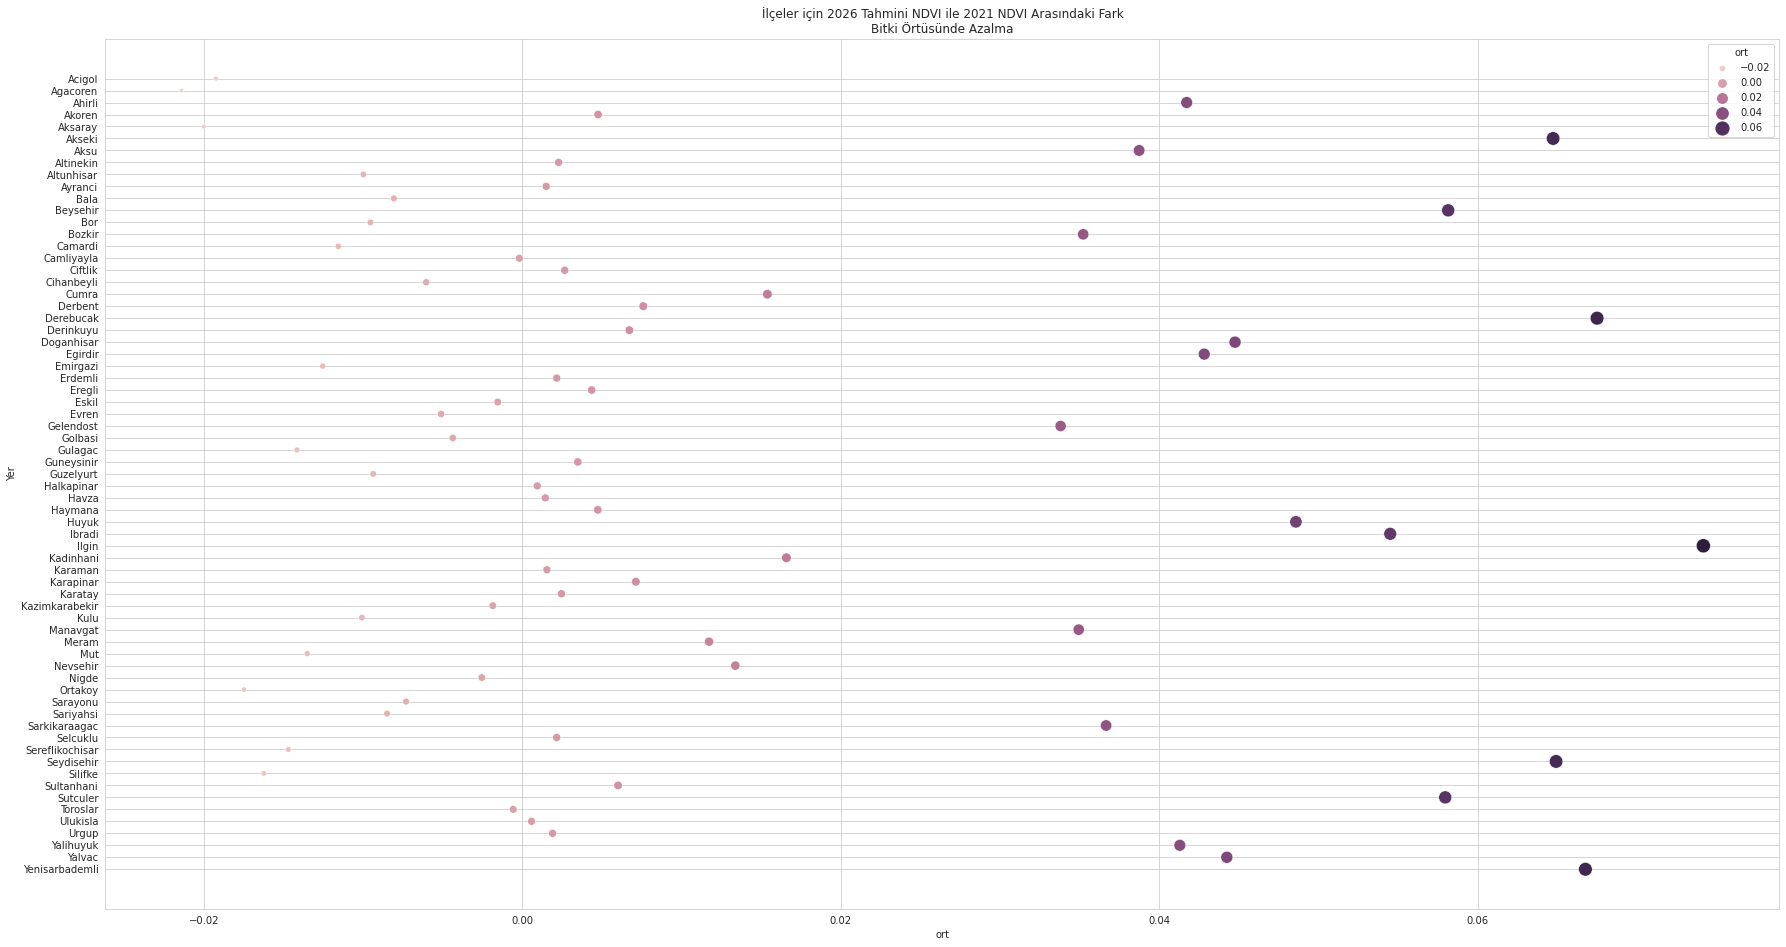

In [11]:
fig, ax = plt.subplots(figsize=(30,16))
sns.scatterplot(x = "ort", y = "Yer", data=fark_df.drop(["Aksaray_il", "Ankara_il", "Antalya_il", "Isparta_il", "Karaman_il", "Konya_il", "Mersin_il",
                                                         "Nevsehir_il", "Nigde_il"]), size="ort",sizes=(20, 200), 
                hue = "ort", ax=ax).set(title="İlçeler için 2026 Tahmini NDVI ile 2021 NDVI Arasındaki Fark\nBitki Örtüsünde Azalma")
plt.show()

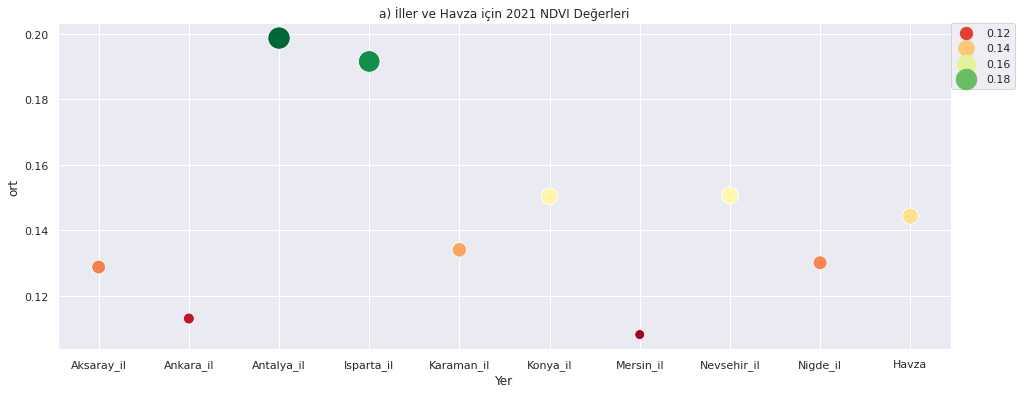

In [52]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x = "Yer", y = "ort", data=ndvi_df.loc[["Aksaray_il", "Ankara_il", "Antalya_il", "Isparta_il", "Karaman_il", "Konya_il", "Mersin_il",
                                                         "Nevsehir_il", "Nigde_il", "Havza"]], size="ort",sizes=(100, 500), 
                hue = "ort", palette = "RdYlGn", ax=ax).set(title="a) İller ve Havza için 2021 NDVI Değerleri")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.savefig("/kaggle/working/iller2021.png")
plt.show()

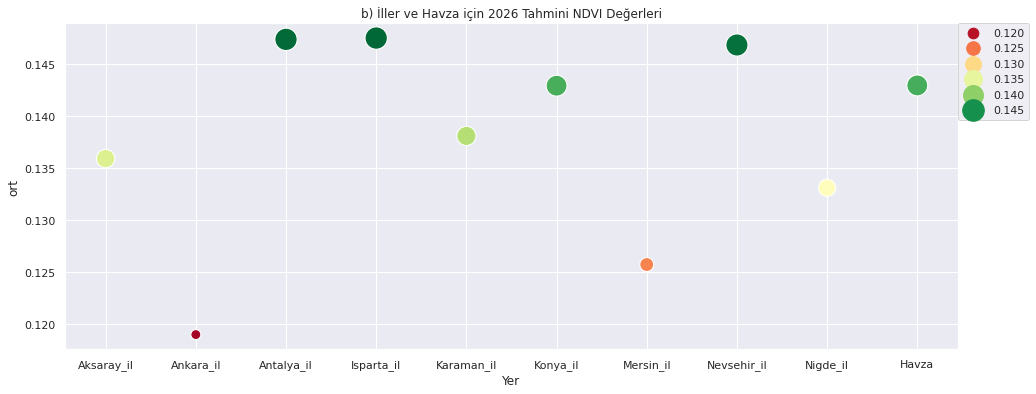

In [51]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x = "Yer", y = "ort", data=ndvis_df.loc[["Aksaray_il", "Ankara_il", "Antalya_il", "Isparta_il", "Karaman_il", "Konya_il", "Mersin_il",
                                                         "Nevsehir_il", "Nigde_il", "Havza"]], size="ort",sizes=(100, 500), 
                hue = "ort", palette = "RdYlGn", vmin=0.12, vmax=0.18, ax=ax).set(title="b) İller ve Havza için 2026 Tahmini NDVI Değerleri")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.savefig("/kaggle/working/iller2026.png")
plt.show()

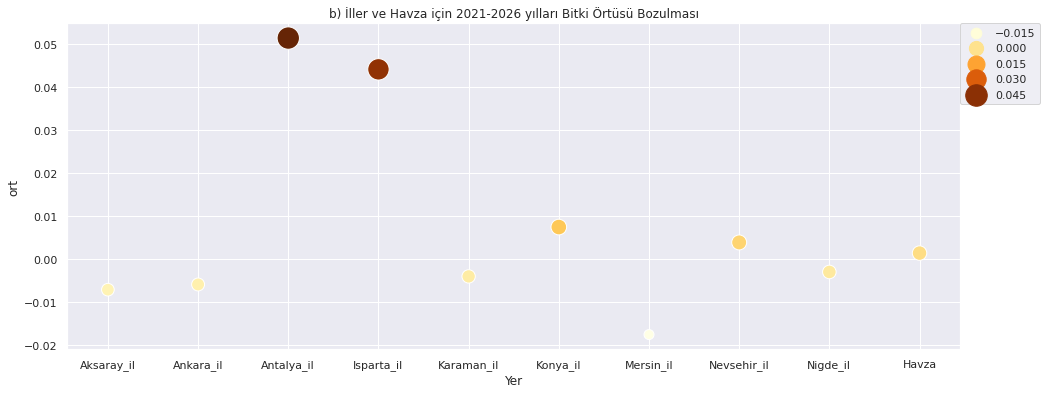

In [50]:
fig, ax = plt.subplots(figsize=(16,6))
sns.set(style="darkgrid")
sns.scatterplot(x = "Yer", y = "ort", data=fark_df.loc[["Aksaray_il", "Ankara_il", "Antalya_il", "Isparta_il", "Karaman_il", "Konya_il", "Mersin_il",
                                                         "Nevsehir_il", "Nigde_il", "Havza"]], size="ort",sizes=(100, 500), 
                hue = "ort", palette = "YlOrBr", ax=ax).set(title="b) İller ve Havza için 2021-2026 yılları Bitki Örtüsü Bozulması")
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
plt.savefig("/kaggle/working/iller_comp.png")
plt.show()

In [ ]:
ndvi_df[ndvi_df.ort == ndvi_df.ort.min()]

In [ ]:
ndvi_df[ndvi_df.ort == ndvi_df.ort.max()]

In [ ]:
ndvi_df.loc["Havza"]

In [ ]:
ndvis_df.loc["Havza"]

In [ ]:
fark_df.loc["Havza"]

In [ ]:
fark_df

In [ ]:
fark_df.loc['Havza']

In [17]:
il_shp = gpd.read_file("../input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.shp")
il_shp = il_shp.to_crs(epsg=4326)
il_shp['centroid'] = il_shp.centroid
il_shp['centroid'] = il_shp['centroid'].to_crs(epsg=4326)
ilce_shp = gpd.read_file("../input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Ilce_Sinirlari_Polygon.shp")
ilce_shp = ilce_shp.to_crs(epsg=4326)
ilce_shp['centroid'] = ilce_shp.centroid
ilce_shp['centroid'] = ilce_shp['centroid'].to_crs(epsg=4326)
il_shp.il = il_shp.il + "_il"
il_shp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys


,il,geometry,centroid
0,Nigde_il,"POLYGON ((35.04489 37.98317, 35.03833 37.98151...",POINT (34.54969 37.98591)
1,Konya_il,"POLYGON ((34.41157 37.35142, 34.39887 37.34340...",POINT (32.81806 37.94680)
2,Mersin_il,"POLYGON ((34.44162 37.32155, 34.44804 37.32087...",POINT (34.45290 37.29713)
3,Karaman_il,"POLYGON ((34.28436 37.22108, 34.27774 37.21775...",POINT (33.47320 37.26002)
4,Mersin_il,"POLYGON ((34.14111 37.19009, 34.13561 37.19010...",POINT (34.02366 37.10653)
5,Mersin_il,"POLYGON ((33.71372 37.02449, 33.71182 37.01303...",POINT (33.56222 36.97993)
6,Antalya_il,"POLYGON ((32.00269 37.08952, 31.99757 37.09001...",POINT (31.96920 37.11357)
7,Antalya_il,"POLYGON ((31.86966 37.23659, 31.86949 37.23662...",POINT (31.85267 37.25813)
8,Antalya_il,"POLYGON ((31.81432 37.31645, 31.81197 37.31807...",POINT (31.72582 37.33993)
9,Antalya_il,"POLYGON ((31.52532 37.33275, 31.52295 37.33075...",POINT (31.44808 37.32176)


In [18]:
ortlst = []
for i, r in il_shp.iterrows():
    for j, k in fark_df.iterrows():
        if j == r.il:
            ortlst.append(k.ort)
            
il_shp["ort"] = ortlst
il_shp

,il,geometry,centroid,ort
0,Nigde_il,"POLYGON ((35.04489 37.98317, 35.03833 37.98151...",POINT (34.54969 37.98591),-0.002943
1,Konya_il,"POLYGON ((34.41157 37.35142, 34.39887 37.34340...",POINT (32.81806 37.94680),0.007476
2,Mersin_il,"POLYGON ((34.44162 37.32155, 34.44804 37.32087...",POINT (34.45290 37.29713),-0.017468
3,Karaman_il,"POLYGON ((34.28436 37.22108, 34.27774 37.21775...",POINT (33.47320 37.26002),-0.003971
4,Mersin_il,"POLYGON ((34.14111 37.19009, 34.13561 37.19010...",POINT (34.02366 37.10653),-0.017468
5,Mersin_il,"POLYGON ((33.71372 37.02449, 33.71182 37.01303...",POINT (33.56222 36.97993),-0.017468
6,Antalya_il,"POLYGON ((32.00269 37.08952, 31.99757 37.09001...",POINT (31.96920 37.11357),0.051326
7,Antalya_il,"POLYGON ((31.86966 37.23659, 31.86949 37.23662...",POINT (31.85267 37.25813),0.051326
8,Antalya_il,"POLYGON ((31.81432 37.31645, 31.81197 37.31807...",POINT (31.72582 37.33993),0.051326
9,Antalya_il,"POLYGON ((31.52532 37.33275, 31.52295 37.33075...",POINT (31.44808 37.32176),0.051326


In [19]:
ilce_shp

,ilce,geometry,centroid
0,Nigde_Merkez,"POLYGON ((35.04489 37.98317, 35.04088 37.98216...",POINT (34.74732 38.10945)
1,Camardi,"POLYGON ((34.86361 37.94323, 34.86529 37.93813...",POINT (34.85741 37.91865)
2,Bor,"POLYGON ((34.85726 37.85531, 34.85031 37.84722...",POINT (34.45304 37.85566)
3,Ulukisla,"POLYGON ((34.62206 37.68925, 34.61587 37.68602...",POINT (34.43086 37.57908)
4,Camliyayla,"POLYGON ((34.50508 37.37900, 34.49775 37.37649...",POINT (34.48395 37.37540)
...,...,...,...
77,Akoren,"POLYGON ((32.39691 37.30014, 32.39691 37.30013...",POINT (32.36484 37.42057)
78,Yalihuyuk,"POLYGON ((32.10773 37.36304, 32.10972 37.35945...",POINT (32.07381 37.31112)
79,Meram,"POLYGON ((32.21194 37.45399, 32.20759 37.45533...",POINT (32.29627 37.70609)
80,Karatay,"POLYGON ((33.15576 37.70506, 33.14416 37.70148...",POINT (32.98949 37.93189)


In [20]:
for i,r in ilce_shp.iterrows():
    if r.ilce == "Nigde_Merkez":
        print("Karaman Merkez oldu")
        ilce_shp["ilce"][i] = "Nigde"
    elif r.ilce == "Aksaray_Merkez":
        print("Karaman Merkez oldu")
        ilce_shp["ilce"][i] = "Aksaray"
    elif r.ilce == "Nevsehir_Merkez":
        print("Karaman Merkez oldu")
        ilce_shp["ilce"][i] = "Nevsehir"

Karaman Merkez oldu
Karaman Merkez oldu
Karaman Merkez oldu


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
ilce_shp

,ilce,geometry,centroid
0,Nigde,"POLYGON ((35.04489 37.98317, 35.04088 37.98216...",POINT (34.74732 38.10945)
1,Camardi,"POLYGON ((34.86361 37.94323, 34.86529 37.93813...",POINT (34.85741 37.91865)
2,Bor,"POLYGON ((34.85726 37.85531, 34.85031 37.84722...",POINT (34.45304 37.85566)
3,Ulukisla,"POLYGON ((34.62206 37.68925, 34.61587 37.68602...",POINT (34.43086 37.57908)
4,Camliyayla,"POLYGON ((34.50508 37.37900, 34.49775 37.37649...",POINT (34.48395 37.37540)
...,...,...,...
77,Akoren,"POLYGON ((32.39691 37.30014, 32.39691 37.30013...",POINT (32.36484 37.42057)
78,Yalihuyuk,"POLYGON ((32.10773 37.36304, 32.10972 37.35945...",POINT (32.07381 37.31112)
79,Meram,"POLYGON ((32.21194 37.45399, 32.20759 37.45533...",POINT (32.29627 37.70609)
80,Karatay,"POLYGON ((33.15576 37.70506, 33.14416 37.70148...",POINT (32.98949 37.93189)


In [22]:
ortlst = []
for i, r in ilce_shp.iterrows():
    for j, k in fark_df.iterrows():
        if j == r.ilce:
            ortlst.append(k.ort)
            
ilce_shp["ort"] = ortlst
ilce_shp

,ilce,geometry,centroid,ort
0,Nigde,"POLYGON ((35.04489 37.98317, 35.04088 37.98216...",POINT (34.74732 38.10945),-0.002545
1,Camardi,"POLYGON ((34.86361 37.94323, 34.86529 37.93813...",POINT (34.85741 37.91865),-0.011568
2,Bor,"POLYGON ((34.85726 37.85531, 34.85031 37.84722...",POINT (34.45304 37.85566),-0.009550
3,Ulukisla,"POLYGON ((34.62206 37.68925, 34.61587 37.68602...",POINT (34.43086 37.57908),0.000574
4,Camliyayla,"POLYGON ((34.50508 37.37900, 34.49775 37.37649...",POINT (34.48395 37.37540),-0.000192
...,...,...,...,...
77,Akoren,"POLYGON ((32.39691 37.30014, 32.39691 37.30013...",POINT (32.36484 37.42057),0.004750
78,Yalihuyuk,"POLYGON ((32.10773 37.36304, 32.10972 37.35945...",POINT (32.07381 37.31112),0.041292
79,Meram,"POLYGON ((32.21194 37.45399, 32.20759 37.45533...",POINT (32.29627 37.70609),0.011725
80,Karatay,"POLYGON ((33.15576 37.70506, 33.14416 37.70148...",POINT (32.98949 37.93189),0.002453


In [23]:
etiketlst = []
for i, r in il_shp.iterrows():
    if r.ort > 0:
        etiketlst.append("Azalma")
    elif r.ort < 0:
        etiketlst.append("Artma")
il_shp["etiket"] = etiketlst
il_shp

,il,geometry,centroid,ort,etiket
0,Nigde_il,"POLYGON ((35.04489 37.98317, 35.03833 37.98151...",POINT (34.54969 37.98591),-0.002943,Artma
1,Konya_il,"POLYGON ((34.41157 37.35142, 34.39887 37.34340...",POINT (32.81806 37.94680),0.007476,Azalma
2,Mersin_il,"POLYGON ((34.44162 37.32155, 34.44804 37.32087...",POINT (34.45290 37.29713),-0.017468,Artma
3,Karaman_il,"POLYGON ((34.28436 37.22108, 34.27774 37.21775...",POINT (33.47320 37.26002),-0.003971,Artma
4,Mersin_il,"POLYGON ((34.14111 37.19009, 34.13561 37.19010...",POINT (34.02366 37.10653),-0.017468,Artma
5,Mersin_il,"POLYGON ((33.71372 37.02449, 33.71182 37.01303...",POINT (33.56222 36.97993),-0.017468,Artma
6,Antalya_il,"POLYGON ((32.00269 37.08952, 31.99757 37.09001...",POINT (31.96920 37.11357),0.051326,Azalma
7,Antalya_il,"POLYGON ((31.86966 37.23659, 31.86949 37.23662...",POINT (31.85267 37.25813),0.051326,Azalma
8,Antalya_il,"POLYGON ((31.81432 37.31645, 31.81197 37.31807...",POINT (31.72582 37.33993),0.051326,Azalma
9,Antalya_il,"POLYGON ((31.52532 37.33275, 31.52295 37.33075...",POINT (31.44808 37.32176),0.051326,Azalma


In [24]:
etiketlst = []
for i, r in ilce_shp.iterrows():
    if r.ort > 0:
        etiketlst.append("Azalma")
    elif r.ort < 0:
        etiketlst.append("Artma")
ilce_shp["etiket"] = etiketlst
ilce_shp

,ilce,geometry,centroid,ort,etiket
0,Nigde,"POLYGON ((35.04489 37.98317, 35.04088 37.98216...",POINT (34.74732 38.10945),-0.002545,Artma
1,Camardi,"POLYGON ((34.86361 37.94323, 34.86529 37.93813...",POINT (34.85741 37.91865),-0.011568,Artma
2,Bor,"POLYGON ((34.85726 37.85531, 34.85031 37.84722...",POINT (34.45304 37.85566),-0.009550,Artma
3,Ulukisla,"POLYGON ((34.62206 37.68925, 34.61587 37.68602...",POINT (34.43086 37.57908),0.000574,Azalma
4,Camliyayla,"POLYGON ((34.50508 37.37900, 34.49775 37.37649...",POINT (34.48395 37.37540),-0.000192,Artma
...,...,...,...,...,...
77,Akoren,"POLYGON ((32.39691 37.30014, 32.39691 37.30013...",POINT (32.36484 37.42057),0.004750,Azalma
78,Yalihuyuk,"POLYGON ((32.10773 37.36304, 32.10972 37.35945...",POINT (32.07381 37.31112),0.041292,Azalma
79,Meram,"POLYGON ((32.21194 37.45399, 32.20759 37.45533...",POINT (32.29627 37.70609),0.011725,Azalma
80,Karatay,"POLYGON ((33.15576 37.70506, 33.14416 37.70148...",POINT (32.98949 37.93189),0.002453,Azalma


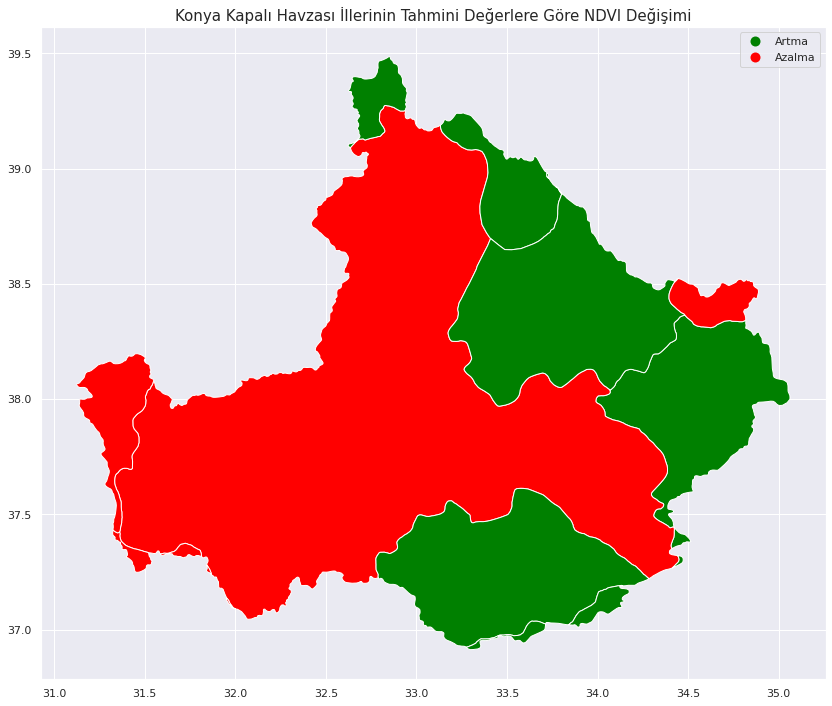

In [25]:
fig, ax = plt.subplots(figsize=(20,12))
cmap = ListedColormap(["green", "red"])
il_shp.plot(ax=ax, column='etiket', categorical=True, legend=True, cmap=cmap)
ax.set_title("Konya Kapalı Havzası İllerinin Tahmini Değerlere Göre NDVI Değişimi", fontdict={'fontsize': 15})
plt.show()

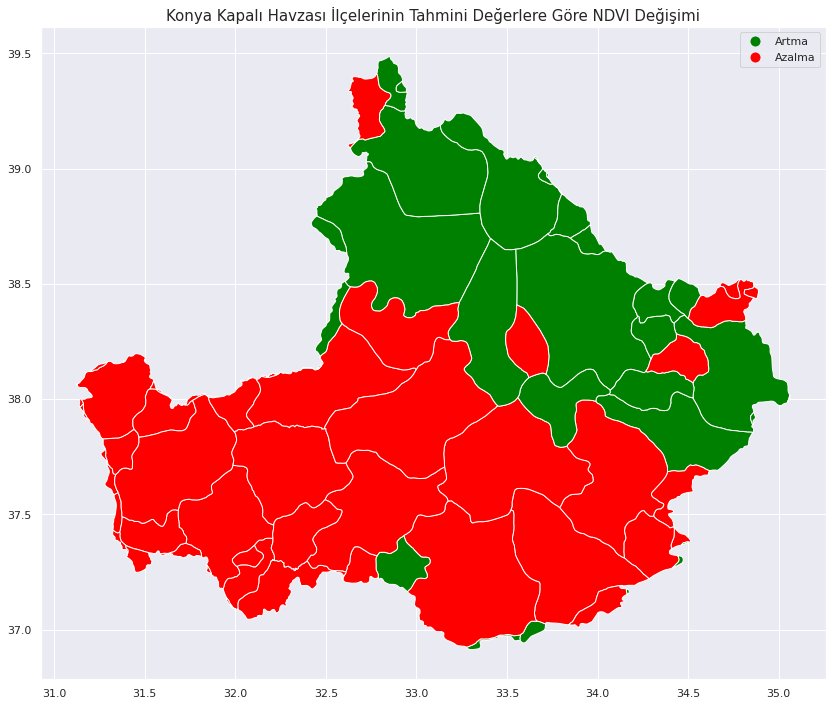

In [26]:
fig, ax = plt.subplots(figsize=(20,12))
cmap = ListedColormap(["green", "red"])
ilce_shp.plot(ax=ax, column='etiket', categorical=True, legend=True, cmap=cmap)
ax.set_title("Konya Kapalı Havzası İlçelerinin Tahmini Değerlere Göre NDVI Değişimi", fontdict={'fontsize': 15})
plt.show()

In [27]:
fig, ax = plt.subplots(figsize=(20,12))
ilce_shp[ilce_shp.etiket == 1].plot(color = "red", ax=ax)
ilce_shp[ilce_shp.etiket == 0].plot(color = "green", ax=ax)
ax.set_title("Konya Kapalı Havzası İlçelerinin Tahmini Değerlere Göre NDVI Değişimi", fontdict={'fontsize': 15})
plt.show()

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

<Figure size 1440x864 with 1 Axes>

In [ ]:
ilce_shp[ilce_shp.ort == ilce_shp.ort.max()]

In [ ]:
ilce_shp[ilce_shp.ort == ilce_shp.ort.min()]

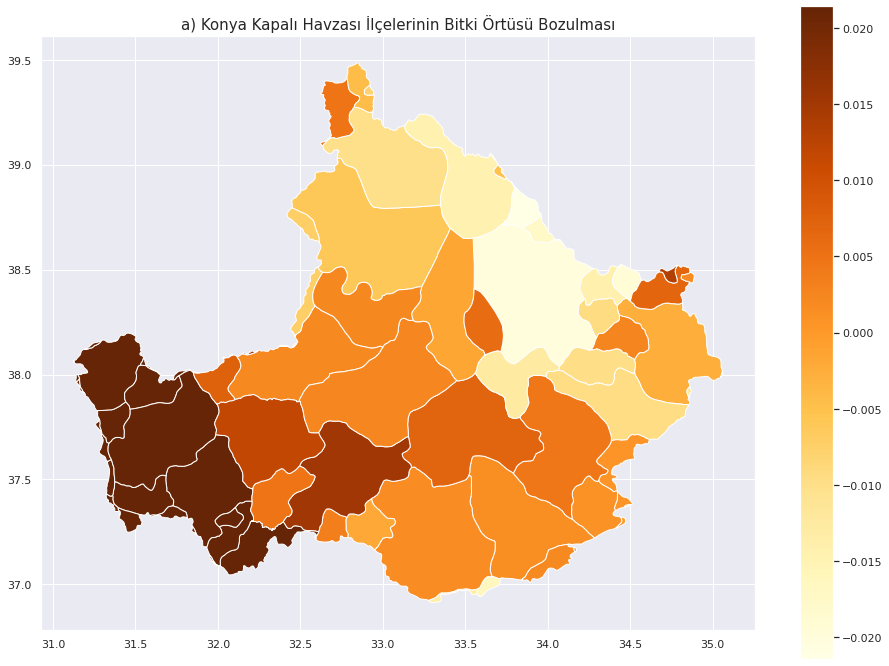

In [29]:
fig, ax = plt.subplots(figsize=(16,12))
ilce_shp.plot(column="ort", cmap = "YlOrBr",vmax= -1 * ilce_shp.ort.min(), ax=ax)
ax.set_title("a) Konya Kapalı Havzası İlçelerinin Bitki Örtüsü Bozulması", fontdict={'fontsize': 15})
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=ilce_shp.ort.min(), vmax= -1 * ilce_shp.ort.min()))
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.savefig("/kaggle/working/ilceler_comp.png")
plt.show()

In [30]:
il_shp = gpd.read_file("../input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.shp")
il_shp = il_shp.to_crs(epsg=4326)
il_shp['centroid'] = il_shp.centroid
il_shp['centroid'] = il_shp['centroid'].to_crs(epsg=4326)
ilce_shp = gpd.read_file("../input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Ilce_Sinirlari_Polygon.shp")
ilce_shp = ilce_shp.to_crs(epsg=4326)
ilce_shp['centroid'] = ilce_shp.centroid
ilce_shp['centroid'] = ilce_shp['centroid'].to_crs(epsg=4326)
il_shp.il = il_shp.il + "_il"
il_shp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys


,il,geometry,centroid
0,Nigde_il,"POLYGON ((35.04489 37.98317, 35.03833 37.98151...",POINT (34.54969 37.98591)
1,Konya_il,"POLYGON ((34.41157 37.35142, 34.39887 37.34340...",POINT (32.81806 37.94680)
2,Mersin_il,"POLYGON ((34.44162 37.32155, 34.44804 37.32087...",POINT (34.45290 37.29713)
3,Karaman_il,"POLYGON ((34.28436 37.22108, 34.27774 37.21775...",POINT (33.47320 37.26002)
4,Mersin_il,"POLYGON ((34.14111 37.19009, 34.13561 37.19010...",POINT (34.02366 37.10653)
5,Mersin_il,"POLYGON ((33.71372 37.02449, 33.71182 37.01303...",POINT (33.56222 36.97993)
6,Antalya_il,"POLYGON ((32.00269 37.08952, 31.99757 37.09001...",POINT (31.96920 37.11357)
7,Antalya_il,"POLYGON ((31.86966 37.23659, 31.86949 37.23662...",POINT (31.85267 37.25813)
8,Antalya_il,"POLYGON ((31.81432 37.31645, 31.81197 37.31807...",POINT (31.72582 37.33993)
9,Antalya_il,"POLYGON ((31.52532 37.33275, 31.52295 37.33075...",POINT (31.44808 37.32176)


In [31]:
for i,r in ilce_shp.iterrows():
    if r.ilce == "Nigde_Merkez":
        print("Karaman Merkez oldu")
        ilce_shp["ilce"][i] = "Nigde"
    elif r.ilce == "Aksaray_Merkez":
        print("Karaman Merkez oldu")
        ilce_shp["ilce"][i] = "Aksaray"
    elif r.ilce == "Nevsehir_Merkez":
        print("Karaman Merkez oldu")
        ilce_shp["ilce"][i] = "Nevsehir"

Karaman Merkez oldu
Karaman Merkez oldu
Karaman Merkez oldu


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
ortlst = []
for i, r in ilce_shp.iterrows():
    for j, k in ndvis_df.iterrows():
        if j == r.ilce:
            ortlst.append(k.ort)
            
ilce_shp["ort"] = ortlst
ilce_shp

,ilce,geometry,centroid,ort
0,Nigde,"POLYGON ((35.04489 37.98317, 35.04088 37.98216...",POINT (34.74732 38.10945),0.134918
1,Camardi,"POLYGON ((34.86361 37.94323, 34.86529 37.93813...",POINT (34.85741 37.91865),0.124040
2,Bor,"POLYGON ((34.85726 37.85531, 34.85031 37.84722...",POINT (34.45304 37.85566),0.115502
3,Ulukisla,"POLYGON ((34.62206 37.68925, 34.61587 37.68602...",POINT (34.43086 37.57908),0.088138
4,Camliyayla,"POLYGON ((34.50508 37.37900, 34.49775 37.37649...",POINT (34.48395 37.37540),0.054119
...,...,...,...,...
77,Akoren,"POLYGON ((32.39691 37.30014, 32.39691 37.30013...",POINT (32.36484 37.42057),0.142656
78,Yalihuyuk,"POLYGON ((32.10773 37.36304, 32.10972 37.35945...",POINT (32.07381 37.31112),0.145404
79,Meram,"POLYGON ((32.21194 37.45399, 32.20759 37.45533...",POINT (32.29627 37.70609),0.166051
80,Karatay,"POLYGON ((33.15576 37.70506, 33.14416 37.70148...",POINT (32.98949 37.93189),0.134144


In [ ]:
ilce_shp[ilce_shp.ort == ilce_shp.ort.max()]

In [ ]:
ilce_shp[ilce_shp.ort == ilce_shp.ort.min()]

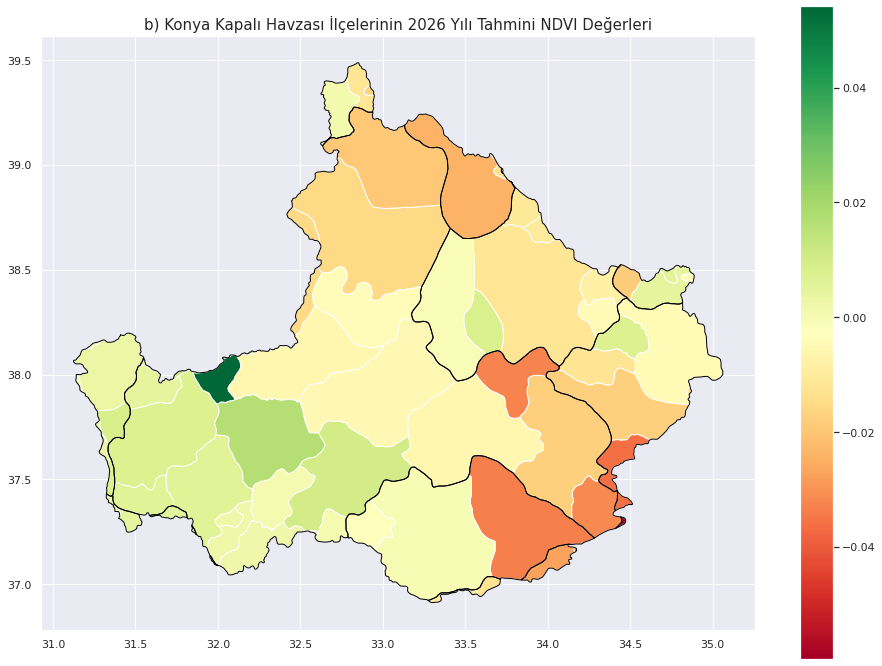

In [35]:
fig, ax = plt.subplots(figsize=(16,12))
ilce_shp.plot(column="ort", cmap = "RdYlGn", ax=ax)
il_shp.plot(color = "none", edgecolor = "black", linewidth = 1, ax=ax)
ax.set_title("b) Konya Kapalı Havzası İlçelerinin 2026 Yılı Tahmini NDVI Değerleri", fontdict={'fontsize': 15})
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=ilce_shp.ort.min(), vmax= -1 * ilce_shp.ort.min()))
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.savefig("/kaggle/working/ilceler2026.png")
plt.show()

In [36]:
ortlst = []
for i, r in ilce_shp.iterrows():
    for j, k in ndvi_df.iterrows():
        if j == r.ilce:
            ortlst.append(k.ort)
            
ilce_shp["ort"] = ortlst
ilce_shp

,ilce,geometry,centroid,ort
0,Nigde,"POLYGON ((35.04489 37.98317, 35.04088 37.98216...",POINT (34.74732 38.10945),0.132373
1,Camardi,"POLYGON ((34.86361 37.94323, 34.86529 37.93813...",POINT (34.85741 37.91865),0.112472
2,Bor,"POLYGON ((34.85726 37.85531, 34.85031 37.84722...",POINT (34.45304 37.85566),0.105952
3,Ulukisla,"POLYGON ((34.62206 37.68925, 34.61587 37.68602...",POINT (34.43086 37.57908),0.088711
4,Camliyayla,"POLYGON ((34.50508 37.37900, 34.49775 37.37649...",POINT (34.48395 37.37540),0.053927
...,...,...,...,...
77,Akoren,"POLYGON ((32.39691 37.30014, 32.39691 37.30013...",POINT (32.36484 37.42057),0.147406
78,Yalihuyuk,"POLYGON ((32.10773 37.36304, 32.10972 37.35945...",POINT (32.07381 37.31112),0.186697
79,Meram,"POLYGON ((32.21194 37.45399, 32.20759 37.45533...",POINT (32.29627 37.70609),0.177776
80,Karatay,"POLYGON ((33.15576 37.70506, 33.14416 37.70148...",POINT (32.98949 37.93189),0.136597


In [ ]:
ilce_shp[ilce_shp.ort == ilce_shp.ort.max()]

In [ ]:
ilce_shp[ilce_shp.ort == ilce_shp.ort.min()]

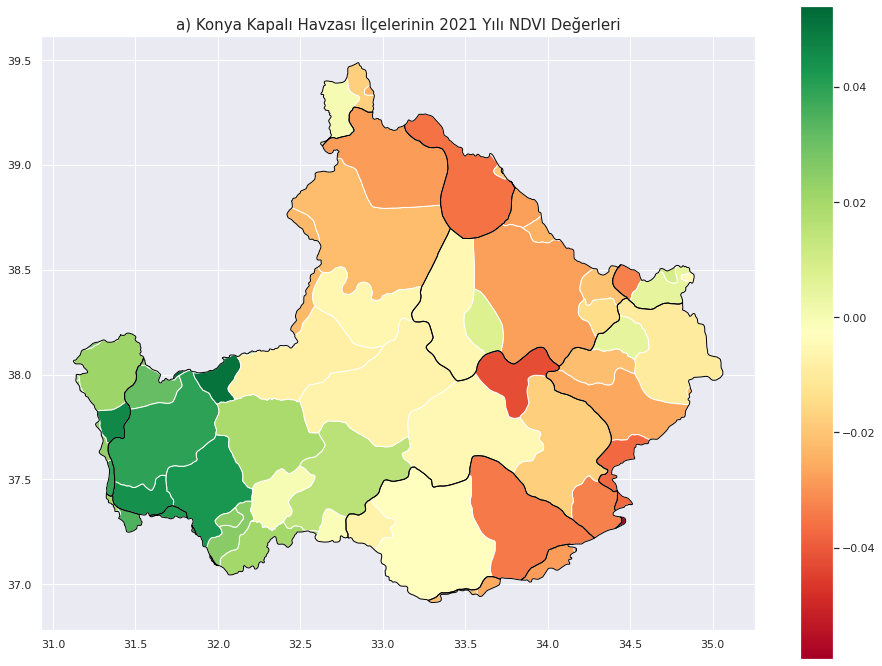

In [38]:
fig, ax = plt.subplots(figsize=(16,12))
ilce_shp.plot(column="ort", cmap = "RdYlGn", ax=ax)
il_shp.plot(color = "none", edgecolor = "black", linewidth = 1, ax=ax)
ax.set_title("a) Konya Kapalı Havzası İlçelerinin 2021 Yılı NDVI Değerleri", fontdict={'fontsize': 15})
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=ilce_shp.ort.min(), vmax= -1 * ilce_shp.ort.min()))
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.savefig("/kaggle/working/ilceler2021.png")
plt.show()

In [ ]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

In [ ]:
np.array(ilce_shp.ilce).reshape(-1,2).shape

In [ ]:
for i in ilce_shp.iterrows():
    print(i[1])

In [ ]:
list(il_shp.il)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
for i in il_shp.iterrows():
    ddf = gpd.GeoDataFrame(i[1]).T
    mosaic = [list(ddf.il)]
    ax_dict = fig.subplot_mosaic(mosaic)
    identify_axes(ax_dict)
    ddf.plot(ax=ax)
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
ilce_shp.plot(ax=ax)
ax_dict = fig.subplot_mosaic(np.array(ilce_shp.ilce).reshape(-1,2).tolist())
#identify_axes(ax_dict)
ax_dict

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
ilce_shp.plot(ax=ax)
ax.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.show()